# 1D CNN
- 입력길이(time step) 방향으로 이동하면 합성곱 연산을 하는 CNN
- padding
    - 입력길이가 줄어드는것을 막기 위해 입력길이의 처음과 끝 부분에 추가로 특정 값으로 채워 넣는것
- Stride
    - 입력길이 방향으로 필터를 이동하는 간격


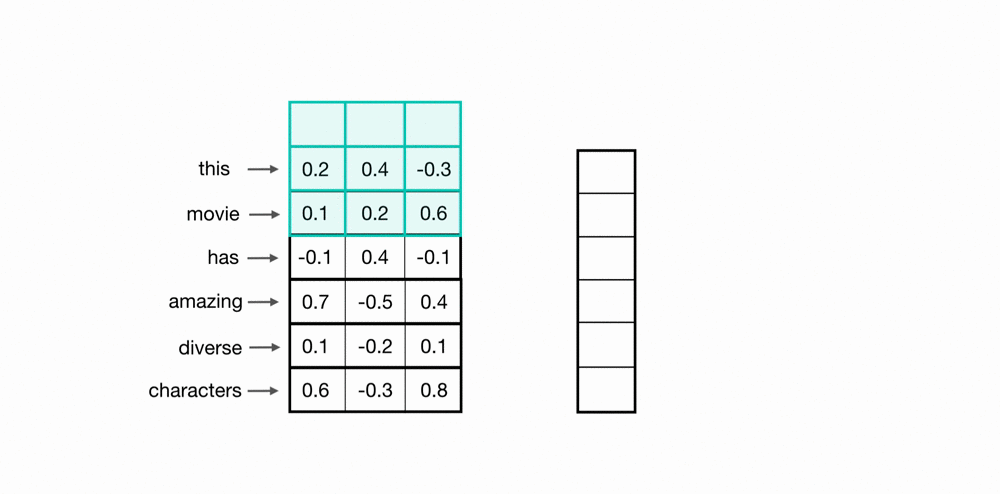

# pooling layer
- 합성곱 layer 의 출력의 입력 길이를 줄이거나 특정 출력부분을 강조하기 위해 사용

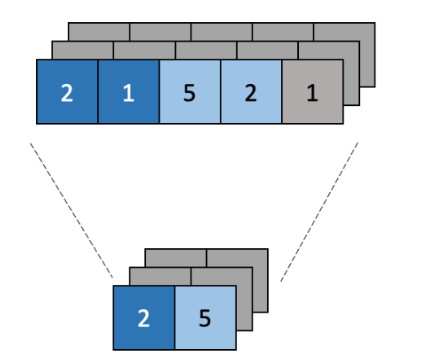

# global pooling layer
- pooling layer 보다 급격하게 입력길이의 차원을 감소 시킨다.
- linear layer 넣기 위해 차원을 변경하기 위한 목적


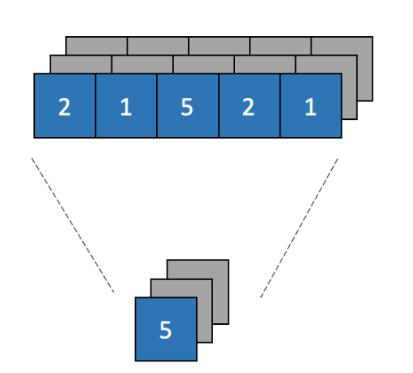

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import torch
from tqdm.auto import tqdm
import random
import os

def reset_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

In [2]:
DATA_PATH = os.getcwd()+'/data/news/'
SEED = 42

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device,DATA_PATH

('cuda', 'c:\\study\\04_NLP/data/news/')

In [3]:
train = pd.read_csv(f"{DATA_PATH}train_news.csv")
test = pd.read_csv(f"{DATA_PATH}test_news.csv")
train.shape, test.shape

((89320, 3), (38280, 2))

# 토큰화 하기

In [4]:
from torchtext.data.utils import get_tokenizer
tokenizer = get_tokenizer("basic_english")
tokenizer("i love you") # 텍스트를 전달하면 토큰화된 리스트 반환

c:\Users\hopio\anaconda3\Lib\site-packages\torchtext\data\__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)


['i', 'love', 'you']

In [5]:
train_list = [ tokenizer(text) for text in train["desc"] ]
test_list = [ tokenizer(text) for text in test["desc"] ]
len(train_list), len(test_list)

(89320, 38280)

In [6]:
train_list # 2차원

[['sudan',
  'has',
  'decided',
  'to',
  'postpone',
  'a',
  'decision',
  'to',
  'expel',
  'the',
  'heads',
  'of',
  'two',
  'british',
  'aid',
  'agencies',
  '-',
  'oxfam',
  'and',
  'save',
  'the',
  'children',
  '-',
  'citing',
  'administrative',
  'difficulties',
  'and',
  'humanitarian',
  'grounds',
  '.'],
 ['cell',
  'phone',
  'manufacturers',
  'are',
  'teaming',
  'up',
  'to',
  'bring',
  'mobile',
  'television',
  'to',
  'your',
  'handset',
  '.'],
 ['although',
  'the',
  'united',
  'states',
  'is',
  'experiencing',
  'a',
  'shortage',
  'of',
  'flu',
  'vaccines',
  'this',
  'fall',
  ',',
  'don',
  "'",
  't',
  'be',
  'so',
  'eager',
  'for',
  'one',
  'that',
  'you',
  "'",
  're',
  'duped',
  'into',
  'purchasing',
  'it',
  'online',
  '.'],
 ['corporate',
  'raider',
  'vincent',
  'bollor',
  'said',
  'yesterday',
  'he',
  'had',
  'raised',
  'his',
  'stake',
  'in',
  'french',
  'advertising',
  'group',
  'havas',
  'to',

# 어휘집 만들기

In [7]:
from torchtext.vocab import build_vocab_from_iterator
vocab = build_vocab_from_iterator(train_list, specials=["<pad>", "<unk>"])
vocab.set_default_index(vocab["<unk>"]) # OOV 발생시 대체할 토큰 지정

c:\Users\hopio\anaconda3\Lib\site-packages\torchtext\vocab\__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
c:\Users\hopio\anaconda3\Lib\site-packages\torchtext\utils.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)


In [8]:
len(vocab)

76536

# 토큰화된 리스트에 단어 번호 부여하기

In [9]:
train_data = [ vocab(lst) for lst in train_list ]
test_data = [ vocab(lst) for lst in test_list ]

len(train_data), len(test_data)

(89320, 38280)

In [10]:
train_data

[[685,
  27,
  925,
  6,
  8551,
  5,
  506,
  6,
  15376,
  3,
  2970,
  7,
  45,
  200,
  913,
  1844,
  12,
  16780,
  9,
  1356,
  3,
  784,
  12,
  1124,
  7671,
  7877,
  9,
  3695,
  5991,
  2],
 [870, 312, 2734, 39, 4935, 58, 6, 1049, 260, 606, 6, 402, 3528, 2],
 [1139,
  3,
  86,
  135,
  23,
  10022,
  5,
  4167,
  7,
  1848,
  8416,
  48,
  677,
  4,
  850,
  18,
  96,
  37,
  255,
  5641,
  13,
  60,
  15,
  143,
  18,
  944,
  19145,
  73,
  8554,
  25,
  180,
  2],
 [705,
  18216,
  9345,
  48361,
  24,
  62,
  42,
  77,
  757,
  32,
  917,
  8,
  449,
  1299,
  95,
  13853,
  6,
  448,
  2,
  145,
  20,
  18749,
  1395,
  66039,
  4,
  13853,
  14,
  10,
  528,
  4,
  10511,
  11,
  234,
  13,
  2060,
  32,
  683,
  8749,
  2167,
  2],
 [31,
  12,
  520,
  979,
  159,
  22,
  182,
  448,
  37936,
  25,
  3633,
  5455,
  6,
  3,
  2079,
  14137,
  920,
  7,
  5899,
  4,
  75545,
  9461,
  1660,
  701,
  11,
  53,
  20,
  3,
  1107,
  71406,
  3,
  2610,
  2002,
  3572,
  

# padding

In [11]:
max_len = max( len(lst) for lst in train_data )
max_len

203

In [12]:
train_data = [ [0] * ( max_len - len(lst) ) + lst  if len(lst) < max_len else lst[:max_len]  for lst in train_data  ]
test_data = [ [0] * ( max_len - len(lst) ) + lst  if len(lst) < max_len else lst[:max_len]  for lst in test_data  ]

In [13]:
train_data

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  685,
  27,
  925,
  6,
  8551,
  5,
  506,
  6,
  15376,
  3,
  2970,
  7,
  45,
  200,
  913,
  1844,
  12,
  16780,
  9,
  1356,
  

In [14]:
train_data[0]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 685,
 27,
 925,
 6,
 8551,
 5,
 506,
 6,
 15376,
 3,
 2970,
 7,
 45,
 200,
 913,
 1844,
 12,
 16780,
 9,
 1356,
 3,
 784,
 12,
 1124,
 7671,
 7877,
 9,
 3695,
 5991,
 2]

In [15]:
train_data = np.array(train_data)
test_data = np.array(test_data)

train_data.shape, test_data.shape

((89320, 203), (38280, 203))

- 정답 데이터

In [16]:
target = train["target"].to_numpy()
target.shape, target.dtype

((89320,), dtype('int64'))

In [17]:
train["target"].value_counts(normalize=True)

target
0    0.25
2    0.25
3    0.25
1    0.25
Name: proportion, dtype: float64

# 데이터셋 클래스 만들기

In [18]:
class NewsDataset(torch.utils.data.Dataset):
    def __init__(self, x, y=None):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        item = {}
        item["x"] = torch.tensor(self.x[idx])
        if self.y is not None:
            item["y"] = torch.tensor(self.y[idx])
        return item

In [19]:
dt = NewsDataset(train_data,target)
dl = torch.utils.data.DataLoader(dt, batch_size=2 , shuffle=False)
batch = next(iter(dl))
batch

{'x': tensor([[    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     

In [20]:
emb_layer = torch.nn.Embedding(len(vocab), 4)
x = emb_layer(batch["x"])
x.shape # batch, seq, feature

torch.Size([2, 203, 4])

# Conv1d
- 주요파라미터
    - in_channels: 첫번째 인수로 input tensor 의 피처크기 전달
    - out_channels: 두번째 인수로 출력 tensor의 피처 크기 전달(커널(필터) 개수를 의미한다.)
    - kernel_size: 세번째 인수로 item step 을 얼마만큼 볼것인가.
        - 필터(커널)의 입력길이 방향의 사이즈
    - stride: 커널(필터)를 얼마만큼 이동하면서 합성곱을 수행할 것인가.
        - default 값은 1
- 입력 텐서의 차원순서(shape)
    - batch, features, seq

In [21]:
conv1d = torch.nn.Conv1d(4, 8, 5)
tmp = conv1d( x.permute(0,2,1) ) # batch, seq, feature -> batch, feature, seq
tmp.shape # result: batch, feature, seq

torch.Size([2, 8, 199])

# Pool1d

In [22]:
avg_pool = torch.nn.AvgPool1d(2)
avg_pool(tmp).shape # batch, feature, seq

torch.Size([2, 8, 99])

In [23]:
avg_pool(tmp)

tensor([[[-0.7721, -0.7721, -0.7721,  ..., -0.6984,  0.0169, -0.1539],
         [-0.1520, -0.1520, -0.1520,  ..., -0.2510,  0.4138, -0.5580],
         [ 0.5541,  0.5541,  0.5541,  ..., -0.4183,  0.2668, -0.0956],
         ...,
         [ 0.0654,  0.0654,  0.0654,  ..., -0.7439, -0.8321, -0.5040],
         [-0.0015, -0.0015, -0.0015,  ...,  0.3267,  0.5435, -0.6664],
         [-0.3990, -0.3990, -0.3990,  ...,  0.9479,  0.9234, -0.2776]],

        [[-0.7721, -0.7721, -0.7721,  ..., -0.2641, -0.2421,  0.1474],
         [-0.1520, -0.1520, -0.1520,  ..., -0.2356,  0.0450,  0.2859],
         [ 0.5541,  0.5541,  0.5541,  ..., -0.1078, -0.2391, -0.1214],
         ...,
         [ 0.0654,  0.0654,  0.0654,  ..., -0.3930, -0.4970, -0.2809],
         [-0.0015, -0.0015, -0.0015,  ..., -0.2396, -0.3127, -0.3326],
         [-0.3990, -0.3990, -0.3990,  ...,  0.4882,  0.4203, -0.1109]]],
       grad_fn=<SqueezeBackward1>)

In [24]:
max_pool = torch.nn.MaxPool1d(2)
max_pool(tmp).shape # batch, feature, seq

torch.Size([2, 8, 99])

In [25]:
max_pool(tmp)

tensor([[[-7.7208e-01, -7.7208e-01, -7.7208e-01,  ..., -1.6267e-01,
           4.7008e-01,  4.3811e-03],
         [-1.5202e-01, -1.5202e-01, -1.5202e-01,  ..., -1.6841e-01,
           8.5515e-01, -4.1826e-01],
         [ 5.5411e-01,  5.5411e-01,  5.5411e-01,  ...,  2.3807e-01,
           5.8688e-01,  2.4880e-01],
         ...,
         [ 6.5393e-02,  6.5393e-02,  6.5393e-02,  ..., -7.3889e-01,
          -4.2812e-01, -1.5305e-01],
         [-1.4705e-03, -1.4705e-03, -1.4705e-03,  ...,  9.0018e-01,
           7.3686e-01, -3.6857e-01],
         [-3.9895e-01, -3.9895e-01, -3.9895e-01,  ...,  1.8522e+00,
           1.1683e+00,  1.6946e-01]],

        [[-7.7208e-01, -7.7208e-01, -7.7208e-01,  ...,  1.5822e-01,
           1.3147e-02,  2.9992e-01],
         [-1.5202e-01, -1.5202e-01, -1.5202e-01,  ..., -1.8826e-01,
           7.9068e-01,  5.0102e-01],
         [ 5.5411e-01,  5.5411e-01,  5.5411e-01,  ..., -5.0228e-02,
           8.1666e-02,  1.3636e-01],
         ...,
         [ 6.5393e-02,  6

# Global pool1d

In [26]:
gl_pool = torch.nn.AdaptiveAvgPool1d(1)
gl_pool(tmp).shape # batch, feature, seq

torch.Size([2, 8, 1])

In [27]:
gl_pool(tmp)

tensor([[[-0.6942],
         [-0.1298],
         [ 0.4800],
         [ 0.3460],
         [-0.3461],
         [ 0.0014],
         [ 0.0543],
         [-0.2858]],

        [[-0.7393],
         [-0.1397],
         [ 0.5306],
         [ 0.3507],
         [-0.3697],
         [ 0.0432],
         [ 0.0175],
         [-0.3523]]], grad_fn=<SqueezeBackward1>)

In [28]:
gl_pool = torch.nn.AdaptiveMaxPool1d(1)
gl_pool(tmp).shape # batch, feature, seq

torch.Size([2, 8, 1])

In [29]:
gl_pool(tmp)

tensor([[[0.8242],
         [1.2956],
         [1.2974],
         [1.1646],
         [0.8753],
         [0.6879],
         [2.2261],
         [1.8522]],

        [[0.3435],
         [0.9463],
         [1.2337],
         [1.5913],
         [0.6199],
         [0.7607],
         [1.1899],
         [2.1948]]], grad_fn=<SqueezeBackward1>)

# 모델 만들기

In [35]:
class Net(torch.nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super().__init__()
        self.emb_layer = torch.nn.Embedding(vocab_size, embedding_dim) # batch, seq, feature

        # 아래의 입력으로 batch, seq, feature -> batch, feature, seq 변환해서 전달
        self.conv1d_block = torch.nn.Sequential(
            torch.nn.Conv1d(embedding_dim, embedding_dim*2, 3), # batch, feature, seq
            torch.nn.ELU(),
            torch.nn.MaxPool1d(2),
            torch.nn.Conv1d(embedding_dim*2, embedding_dim*4, 3), # batch, feature, seq
            torch.nn.ELU(),
            torch.nn.MaxPool1d(2),
        )
        self.rnn_layer = torch.nn.GRU(embedding_dim*4, embedding_dim*8, bidirectional=True,batch_first=True)

        self.output_layer = torch.nn.Linear(embedding_dim*8*2, 4) # output layer

    def forward(self, x):
        x = self.emb_layer(x)
        x = x.permute(0,2,1) # b, s, f -> b, f, s
        x = self.conv1d_block(x) # b , f, s
        x = x.permute(0,2,1) # b , f, s -> b , s, f
        _, hn = self.rnn_layer(x) # hn : nlayer, b, f
        hn=hn.permute(1,0,2).flatten(1)

        return self.output_layer(hn)

In [36]:
# class Net(torch.nn.Module):
#     def __init__(self, vocab_size, embedding_dim):
#         super().__init__()
#         self.emb_layer = torch.nn.Embedding(vocab_size, embedding_dim) # batch, seq, feature

#         # 아래의 입력으로 batch, seq, feature -> batch, feature, seq 변환해서 전달
#         self.conv1d_block = torch.nn.Sequential(
#             torch.nn.Conv1d(embedding_dim, embedding_dim*2, 3), # batch, feature, seq
#             torch.nn.ELU(),
#             torch.nn.MaxPool1d(2),
#             torch.nn.Conv1d(embedding_dim*2, embedding_dim*4, 3), # batch, feature, seq
#             torch.nn.ELU(),
#             torch.nn.MaxPool1d(2),
#             torch.nn.AdaptiveMaxPool1d(1), # batch, feature, 1
#             torch.nn.Flatten(), # batch, feature
#             torch.nn.Linear(embedding_dim*4, 4) # output layer
#         )

#     def forward(self, x):
#         x = self.emb_layer(x)
#         x = x.permute(0,2,1) # b, s, f -> b, f, s
#         return self.conv1d_block(x)

In [37]:
model = Net( len(vocab), 64 )
model(batch["x"])

tensor([[-0.0766,  0.0164,  0.0511, -0.0119],
        [-0.0619,  0.0122,  0.0710, -0.0242]], grad_fn=<AddmmBackward0>)

# 학습 loop 함수 만들기

In [38]:
def train_loop(dataloader, model, loss_fn, optimizer, device):
    epoch_loss = 0
    model.train() # 학습 모드
    
    for batch in dataloader:
        pred = model( batch["x"].to(device) )
        loss = loss_fn( pred, batch["y"].to(device) )

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    epoch_loss /= len(dataloader)
    return epoch_loss

# 검증 or 예측 loop 함수 만들기

In [39]:
@torch.no_grad()
def test_loop(dataloader, model, loss_fn, device):
    epoch_loss = 0
    pred_list = []
    act_func = torch.nn.Softmax(dim=1)
    model.eval() # 평가 모드

    for batch in dataloader:
        pred = model( batch["x"].to(device) )
        
        if batch.get("y") is not None:
            loss = loss_fn( pred, batch["y"].to(device) )
            epoch_loss += loss.item()

        pred = act_func(pred) # logit 값을 확률로 변환
        pred = pred.to("cpu").numpy() # cpu 이동후 ndarray 로변환
        pred_list.append(pred)

    epoch_loss /= len(dataloader)
    pred = np.concatenate(pred_list)
    return epoch_loss, pred

# 하이퍼파라미터 정의

In [40]:
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
n_splits = 5
cv = KFold(n_splits, shuffle=True, random_state=SEED)

batch_size = 32 # 배치 사이즈
loss_fn = torch.nn.CrossEntropyLoss() # 손실 객체
epochs = 100 # 최대 가능한 에폭수

vocab_size = len(vocab) # 단어 사전 크기
embedding_dim = 64 # 임베딩 벡터 크기

# 학습

In [41]:
os.chdir(r'C:\study\04_NLP\data\news\weight')

print(os.getcwd())

is_holdout = False
reset_seeds(SEED) # 재현을 위해 시드고정
best_score_list = []
for i, (tri, vai) in enumerate( cv.split(train_data) ):
    # 학습용 데이터로더 객체
    train_dt = NewsDataset(train_data[tri], target[tri])
    train_dl = torch.utils.data.DataLoader(train_dt, batch_size=batch_size, shuffle=True)

    # 검증용 데이터로더 객체
    valid_dt = NewsDataset(train_data[vai], target[vai])
    valid_dl = torch.utils.data.DataLoader(valid_dt, batch_size=batch_size, shuffle=False)

    # 모델 객체와 옵티마이저 객체 생성
    model = Net(vocab_size,embedding_dim).to(device)
    optimizer = torch.optim.Adam( model.parameters() )

    best_score = 0 # 현재 최고 점수
    patience = 0 # 조기 종료 조건을 주기 위한 변수
    for epoch in tqdm(range(epochs)):
        train_loss = train_loop(train_dl, model, loss_fn, optimizer, device)
        valid_loss, pred = test_loop(valid_dl, model, loss_fn, device)

        pred = np.argmax(pred, axis=1) # 다중분류 문제에서 클래스 번호 결정
        score = f1_score(target[vai], pred, average="micro")

        #print(train_loss, valid_loss, score)
        
        if score > best_score:
            best_score = score # 최고 점수 업데이트
            patience = 0
            torch.save(model.state_dict(), f"Conv1d_model_{i}.pth") # 최고 점수 모델 가중치 저장

        patience += 1
        if patience == 5:
            break

    print(f"{i}번째 폴드 최고 F1-Score micro: {best_score}")
    best_score_list.append(best_score)

    if is_holdout:
        break

C:\study\04_NLP\data\news\weight


  0%|          | 0/100 [00:00<?, ?it/s]

0번째 폴드 최고 F1-Score micro: 0.8887707120465741


  0%|          | 0/100 [00:00<?, ?it/s]

1번째 폴드 최고 F1-Score micro: 0.8910658307210031


  0%|          | 0/100 [00:00<?, ?it/s]

2번째 폴드 최고 F1-Score micro: 0.8874272279444694


  0%|          | 0/100 [00:00<?, ?it/s]

3번째 폴드 최고 F1-Score micro: 0.8887147335423198


  0%|          | 0/100 [00:00<?, ?it/s]

4번째 폴드 최고 F1-Score micro: 0.8910098522167488


In [42]:
np.mean(best_score_list) # 0.8832960143304971, 0.889397671294223

0.889397671294223

# 추론

In [42]:
test_dt = NewsDataset(test_data)
test_dl = torch.utils.data.DataLoader(test_dt, batch_size=batch_size, shuffle=False)

In [43]:
pred_list = []
for i in range(n_splits):
    model = Net(vocab_size, embedding_dim).to(device) # 모델 객체 생성
    state_dict = torch.load(f"Conv1d_model_{i}.pth") # 폴드별 학습된 모델 가중치
    model.load_state_dict(state_dict) # 학습된 가중치 모델에 반영

    _, pred = test_loop(test_dl, model, loss_fn, device)
    pred_list.append(pred)

    if is_holdout:
        break

In [44]:
pred = np.mean(pred_list,axis=0) # 산술평균 앙상블
pred.shape

(38280, 4)

In [45]:
pred = np.argmax(pred,axis=1) # 가장 높은 확률의 클래스 번호를 정답 클래스로 선택

In [46]:
submit = pd.DataFrame(pred, columns=["target"])
submit

target
0           2
1           1
2           3
3           3
4           0
...       ...
38275       1
38276       2
38277       1
38278       3
38279       2

[38280 rows x 1 columns]

In [ ]:
submit.to_csv("conv1d_result.csv", index=False)

# 응용하기
## Conv2d
- 주요 파라미터

    - in_channels: 입력 텐서의 채널 수를 전달.
    - out_channels: 출력 텐서의 채널 수를 지정 (필터의 개수).
    - kernel_size: 필터의 높이와 너비를 지정.
    - stride: 필터가 이동할 간격을 지정 (기본값은 1).
    - padding: 입력 텐서의 가장자리에 추가할 여백 크기 (옵션).
    - dilation: 필터 내부 요소 간격을 확장하는 정도를 지정 (옵션).
입력 텐서의 차원 순서 (shape)

    -   batch, channels, height, width

In [170]:
emb_layer = torch.nn.Embedding(len(vocab), 4)
x = emb_layer(batch["x"])
x.shape 

torch.Size([3, 203, 4])

In [171]:
train_data.shape, test_data.shape

((89320, 203), (38280, 203))

In [205]:
import torch.utils


class App_Dataset(torch.utils.data.Dataset):
    def __init__(self,x,y=None):
        self.x=torch.tensor(x)
        if y is not None:
            self.y=torch.tensor(y)

    def __len__(self):
        return len(self.x)
    
    def __getitem__(self,idx):
        return {'x':self.x[idx],'y':self.y[idx] }if self.y is not None else {'x':self.x[idx]}

In [206]:
dt=App_Dataset(train_data,target)
dl=torch.utils.data.DataLoader(dt,batch_size=3,shuffle=False)
batch = next(iter(dl))
batch

{'x': tensor([[    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     

In [207]:
emb_layer = torch.nn.Embedding(len(vocab), 4)
x = emb_layer(batch["x"])
x.shape # batch, seq, feature

torch.Size([3, 203, 4])

In [208]:
conv1d = torch.nn.Conv1d(4, 8, 5)
tmp = conv1d( x.permute(0,2,1) ) # batch, seq, feature -> batch, feature, seq
tmp[0],tmp.shape,tmp.shape[0] # result: batch, feature, seq

(tensor([[-0.0687, -0.0687, -0.0687,  ..., -0.6952, -0.4046, -0.7124],
         [ 0.1180,  0.1180,  0.1180,  ..., -1.4924, -0.6526,  1.0995],
         [ 0.1875,  0.1875,  0.1875,  ...,  0.5410,  0.1458, -0.8641],
         ...,
         [-0.3351, -0.3351, -0.3351,  ...,  0.5892, -0.5057,  0.9597],
         [ 0.2302,  0.2302,  0.2302,  ...,  0.7343,  1.1759, -0.3010],
         [-0.1323, -0.1323, -0.1323,  ...,  0.6840,  0.3339, -0.5008]],
        grad_fn=<SelectBackward0>),
 torch.Size([3, 8, 199]),
 3)

In [209]:
# (batch, channels, height, width)
conv2d = torch.nn.Conv2d(tmp.shape[0], 3, (1,5))
tmp = conv2d( tmp ) # batch, seq, feature -> batch, feature, seq
tmp[0],tmp.shape,tmp.shape[0] # result: batch, feature, seq

(tensor([[-0.1404, -0.1404, -0.1404,  ...,  0.3435,  0.2837, -0.6391],
         [-0.1057, -0.1057, -0.1057,  ..., -0.2160, -0.0350, -0.8828],
         [-0.0928, -0.0928, -0.0928,  ...,  0.1941,  0.2961,  0.2951],
         ...,
         [-0.1898, -0.1898, -0.1898,  ..., -0.0496, -0.1610, -0.3027],
         [-0.0849, -0.0849, -0.0849,  ..., -0.7780, -1.6045,  0.1186],
         [-0.1522, -0.1522, -0.1522,  ..., -0.8333, -0.2115,  0.5012]],
        grad_fn=<SelectBackward0>),
 torch.Size([3, 8, 195]),
 3)

In [210]:
tmp=tmp.unsqueeze(0)

print(tmp.shape)

conv3d=torch.nn.Conv3d(tmp.shape[0],3,1,5)
tmp=conv3d( tmp )
tmp,tmp.shape

torch.Size([1, 3, 8, 195])


(tensor([[[[ 0.1078,  0.1078,  0.1078,  0.1078,  0.1078,  0.1078,  0.1078,
             0.1078,  0.1078,  0.1078,  0.1078,  0.1078,  0.1078,  0.1078,
             0.1078,  0.1078,  0.1078,  0.1078,  0.1078,  0.1078,  0.1078,
             0.1078,  0.1078,  0.1078,  0.1078,  0.1078,  0.1078,  0.1078,
             0.1078,  0.1078,  0.1078,  0.1078,  0.1078,  0.0587, -0.0346,
            -0.0893,  0.1058,  0.0988, -0.2275],
           [ 0.0890,  0.0890,  0.0890,  0.0890,  0.0890,  0.0890,  0.0890,
             0.0890,  0.0890,  0.0890,  0.0890,  0.0890,  0.0890,  0.0890,
             0.0890,  0.0890,  0.0890,  0.0890,  0.0890,  0.0890,  0.0890,
             0.0890,  0.0890,  0.0890,  0.0890,  0.0890,  0.0890,  0.0890,
             0.0890,  0.0890,  0.0890,  0.0890,  0.0890,  0.1178,  0.1417,
             0.0783,  0.2491,  0.1304,  0.0200]]],
 
 
         [[[ 0.8575,  0.8575,  0.8575,  0.8575,  0.8575,  0.8575,  0.8575,
             0.8575,  0.8575,  0.8575,  0.8575,  0.8575,  0.8575,  0.85

In [211]:
tmp=tmp.flatten(2)
tmp.shape

torch.Size([3, 1, 78])

In [231]:
import torch.nn as nn

class Multi_conv(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super().__init__()
        self.emb_layer = nn.Embedding(vocab_size, embedding_dim)  # (batch, seq, feature)

        self.conv1d_block = nn.Sequential(
            nn.Conv1d(embedding_dim, embedding_dim * 2, 3), 
            nn.ELU(),
            nn.MaxPool1d(2),
            nn.Conv1d(embedding_dim * 2, embedding_dim * 4, 3), 
            nn.ELU(),
            nn.MaxPool1d(2)
        )
        
        self.conv2d_block = nn.Sequential(
            nn.Conv2d(1, embedding_dim * 4, (1, 3)), 
            nn.ELU()
        )
        
        self.conv3d_block = nn.Sequential(
            nn.Conv3d(embedding_dim * 4, embedding_dim * 8, (1, 3, 5)),
            nn.ELU()
        )
        
        # Initial dummy values for rnn_input_size
        self.rnn_input_size = embedding_dim * 8
        self.rnn_layer = nn.GRU(self.rnn_input_size, embedding_dim * 4, batch_first=True)

        self.output_layer = nn.Linear(embedding_dim * 4, 4)  # output layer

    def forward(self, x):
        # Embedding layer
        x = self.emb_layer(x)  # (batch, seq, feature)
        
        # Apply 1D convolution
        x = x.permute(0, 2, 1)  # (batch, feature, seq)
        x = self.conv1d_block(x)  # (batch, feature_out, seq_out)
        #print("After 1D Conv:", x.shape)
        
        # Apply 2D convolution
        x = x.unsqueeze(1)  # (batch, 1, feature_out, seq_out) for Conv2d
        x = self.conv2d_block(x)  # (batch, feature_out, 1, seq_out)
        #print("After 2D Conv:", x.shape)
        
        # Apply 3D convolution
        x = x.unsqueeze(2)  # (batch, feature_out, 1, 1, seq_out) for Conv3d
        x = self.conv3d_block(x)  # (batch, feature_out, 1, 1, seq_out_out)
        #print("After 3D Conv:", x.shape)
        
        # Flatten for RNN
        x = x.flatten(start_dim=1)  # Flatten except batch dimension
        #print("After Flatten:", x.shape)
        
        # Determine sequence length based on flattened output
        seq_length = x.shape[1] // self.rnn_input_size
        
        # Reshape to (batch, seq_length, features) for RNN
        x = x.view(x.shape[0], seq_length, self.rnn_input_size)  # (batch, seq_length, features)
        #print("After Reshape for RNN:", x.shape)
        
        # Apply RNN
        x, _ = self.rnn_layer(x)  # (batch, seq_length, rnn_out_features)
        
        # Apply final linear layer
        x = self.output_layer(x[:, -1, :])  # Use the output of the last RNN timestep
        
        return x

In [232]:
model=Multi_conv(len(vocab),64)
model(batch['x'])

After 1D Conv: torch.Size([3, 256, 23])
After 2D Conv: torch.Size([3, 256, 256, 21])
After 3D Conv: torch.Size([3, 512, 1, 254, 17])
After Flatten: torch.Size([3, 2210816])
After Reshape for RNN: torch.Size([3, 4318, 512])


tensor([[-0.0055, -0.1025,  0.0334,  0.0003],
        [-0.0183, -0.1319,  0.0530, -0.0250],
        [-0.0159, -0.1224,  0.0520, -0.0240]], grad_fn=<AddmmBackward0>)

In [234]:
def train_loop(dataloader, model, loss_fn, optimizer, device):
    epoch_loss = 0
    model.train() # 학습 모드
    for batch in dataloader:
        pred = model( batch["x"].to(device) )
        loss = loss_fn( pred, batch["y"].to(device) )

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    epoch_loss /= len(dataloader)
    return epoch_loss

In [235]:
def train_loop(dataloader, model, loss_fn, optimizer, device):
    epoch_loss = 0
    model.train() # 학습 모드
    for batch in dataloader:
        pred = model( batch["x"].to(device) )
        loss = loss_fn( pred, batch["y"].to(device) )

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    epoch_loss /= len(dataloader)
    return epoch_loss

In [236]:
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
n_splits = 5
cv = KFold(n_splits, shuffle=True, random_state=SEED)

batch_size = 32 # 배치 사이즈
loss_fn = torch.nn.CrossEntropyLoss() # 손실 객체
epochs = 100 # 최대 가능한 에폭수

vocab_size = len(vocab) # 단어 사전 크기
embedding_dim = 64 # 임베딩 벡터 크기

In [238]:
os.chdir(r'C:\NLP_Papers_Review\04_NLP\data\news\weight')

print(os.getcwd())

is_holdout = False
reset_seeds(SEED) # 재현을 위해 시드고정
best_score_list = []
for i, (tri, vai) in enumerate( cv.split(train_data) ):
    # 학습용 데이터로더 객체
    train_dt = NewsDataset(train_data[tri], target[tri])
    train_dl = torch.utils.data.DataLoader(train_dt, batch_size=batch_size, shuffle=True)

    # 검증용 데이터로더 객체
    valid_dt = NewsDataset(train_data[vai], target[vai])
    valid_dl = torch.utils.data.DataLoader(valid_dt, batch_size=batch_size, shuffle=False)

    # 모델 객체와 옵티마이저 객체 생성
    model = Net(vocab_size,embedding_dim).to(device)
    optimizer = torch.optim.Adam( model.parameters() )

    best_score = 0 # 현재 최고 점수
    patience = 0 # 조기 종료 조건을 주기 위한 변수
    for epoch in tqdm(range(epochs)):
        train_loss = train_loop(train_dl, model, loss_fn, optimizer, device)
        valid_loss, pred = test_loop(valid_dl, model, loss_fn, device)

        pred = np.argmax(pred, axis=1) # 다중분류 문제에서 클래스 번호 결정
        score = f1_score(target[vai], pred, average="micro")

        #print(train_loss, valid_loss, score)
        
        if score > best_score:
            best_score = score # 최고 점수 업데이트
            patience = 0
            torch.save(model.state_dict(), f"Multi_conv_model_{i}.pth") # 최고 점수 모델 가중치 저장

        patience += 1
        if patience == 5:
            break

    print(f"{i}번째 폴드 최고 F1-Score micro: {best_score}")
    best_score_list.append(best_score)

    if is_holdout:
        break

C:\NLP_Papers_Review\04_NLP\data\news\weight


  0%|          | 0/100 [00:00<?, ?it/s]

0번째 폴드 최고 F1-Score micro: 0.8906180026869682


  0%|          | 0/100 [00:00<?, ?it/s]

1번째 폴드 최고 F1-Score micro: 0.8896103896103896


  0%|          | 0/100 [00:00<?, ?it/s]

2번째 폴드 최고 F1-Score micro: 0.8876511419614868


  0%|          | 0/100 [00:00<?, ?it/s]

3번째 폴드 최고 F1-Score micro: 0.8892745185848634


  0%|          | 0/100 [00:00<?, ?it/s]

4번째 폴드 최고 F1-Score micro: 0.8898902821316614


In [239]:
test_dt = NewsDataset(test_data)
test_dl = torch.utils.data.DataLoader(test_dt, batch_size=batch_size, shuffle=False)

pred_list = []
for i in range(n_splits):
    model = Net(vocab_size, embedding_dim).to(device) # 모델 객체 생성
    state_dict = torch.load(f"Conv1d_model_{i}.pth") # 폴드별 학습된 모델 가중치
    model.load_state_dict(state_dict) # 학습된 가중치 모델에 반영

    _, pred = test_loop(test_dl, model, loss_fn, device)
    pred_list.append(pred)

    if is_holdout:
        break

pred = np.mean(pred_list,axis=0) # 산술평균 앙상블
pred.shape

pred = np.argmax(pred,axis=1) # 가장 높은 확률의 클래스 번호를 정답 클래스로 선택

submit = pd.DataFrame(pred, columns=["target"])
submit

submit.to_csv("Conv1d_model_result.csv", index=False)